<a href="https://colab.research.google.com/github/subhra004/subhra004/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:07<00:00, 26.4MB/s]
100% 163M/163M [00:07<00:00, 23.3MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


data  face-mask-dataset.zip  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_501.jpg', 'with_mask_286.jpg', 'with_mask_3580.jpg', 'with_mask_3408.jpg', 'with_mask_2176.jpg']
['with_mask_3360.jpg', 'with_mask_621.jpg', 'with_mask_3448.jpg', 'with_mask_2874.jpg', 'with_mask_3248.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1538.jpg', 'without_mask_3436.jpg', 'without_mask_2217.jpg', 'without_mask_227.jpg', 'without_mask_3542.jpg']
['without_mask_3603.jpg', 'without_mask_2017.jpg', 'without_mask_1308.jpg', 'without_mask_2939.jpg', 'without_mask_2475.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0



In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

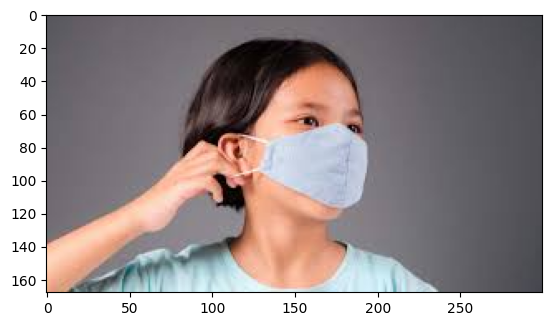

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2840.jpg')
imgplot = plt.imshow(img)
plt.show()

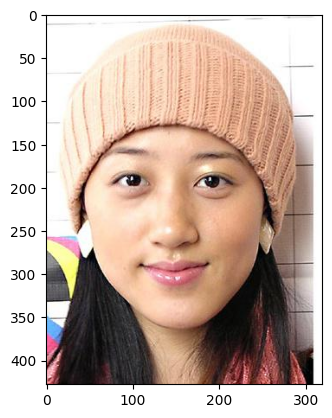

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1292.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. resize the Images

2. Convert the images to numpy arrays



In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 32,  17,  38],
        [ 31,  16,  37],
        [ 33,  19,  40],
        ...,
        [167, 132, 136],
        [133, 103, 108],
        [ 98,  72,  77]],

       [[ 31,  16,  34],
        [ 35,  19,  37],
        [ 43,  27,  45],
        ...,
        [177, 139, 140],
        [167, 136, 136],
        [139, 110, 111]],

       [[ 44,  27,  43],
        [ 46,  29,  45],
        [ 50,  32,  48],
        ...,
        [162, 121, 118],
        [172, 136, 133],
        [177, 144, 141]],

       ...,

       [[ 45,  33,  53],
        [ 47,  35,  55],
        [ 39,  27,  47],
        ...,
        [ 33,  25,  47],
        [ 27,  17,  38],
        [ 63,  54,  74]],

       [[ 57,  45,  65],
        [ 58,  46,  66],
        [ 60,  48,  68],
        ...,
        [ 56,  46,  61],
        [ 55,  46,  59],
        [ 57,  50,  61]],

       [[ 46,  34,  54],
        [ 49,  37,  57],
        [ 49,  37,  57],
        ...,
        [172, 162, 168],
        [170, 161, 165],
        [178, 170, 171]]], dtype=uint8)
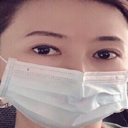

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [120, 102,  92],
        [117,  99,  87],
        [127, 109,  96]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [101,  83,  72],
        [105,  87,  75],
        [103,  85,  73]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [106,  88,  77],
        [ 97,  79,  67],
        [ 98,  80,  69]],

       ...,

       [[227, 226, 222],
        [227, 226, 222],
        [227, 226, 222],
        ...,
        [225, 206, 193],
        [226, 208, 194],
        [227, 209, 195]],

       [[227, 226, 222],
        [227, 226, 222],
        [227, 226, 222],
        ...,
        [228, 210, 197],
        [230, 212, 198],
        [231, 213, 199]],

       [[227, 226, 222],
        [227, 226, 222],
        [227, 226, 222],
        ...,
        [230, 212, 198],
        [232, 214, 201],
        [233, 215, 202]]], dtype=uint8)
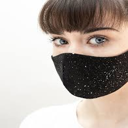

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.47058824, 0.4       , 0.36078431],
        [0.45882353, 0.38823529, 0.34117647],
        [0.49803922, 0.42745098, 0.37647059]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.39607843, 0.3254902 , 0.28235294],
        [0.41176471, 0.34117647, 0.29411765],
        [0.40392157, 0.33333333, 0.28627451]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.41568627, 0.34509804, 0.30196078],
        [0.38039216, 0.30980392, 0.2627451 ],
        [0.38431373, 0.31372549, 0.27058824]],

       ...,

       [[0.89019608, 0.88627451, 0.87058824],
        [0.89019608, 0.88627451, 0.87058824],
        [0.89019608, 0

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4420 - acc: 0.8155 - val_loss: 0.2905 - val_acc: 0.8727
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2976 - acc: 0.8856 - val_loss: 0.2508 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2576 - acc: 0.8935 - val_loss: 0.2166 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2085 - acc: 0.9169 - val_loss: 0.2156 - val_acc: 0.9025
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1802 - acc: 0.9307 - val_loss: 0.2189 - val_acc: 0.8975


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2309 - acc: 0.9107
Test Accuracy = 0.9106552004814148


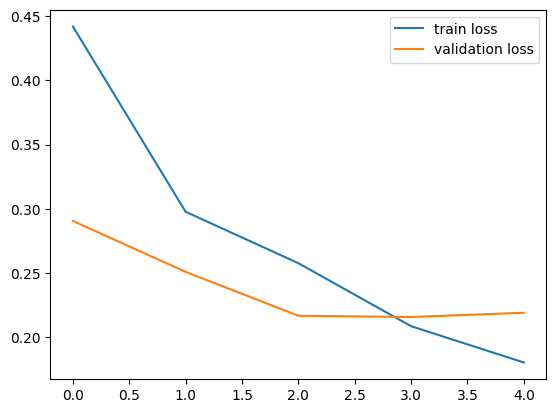

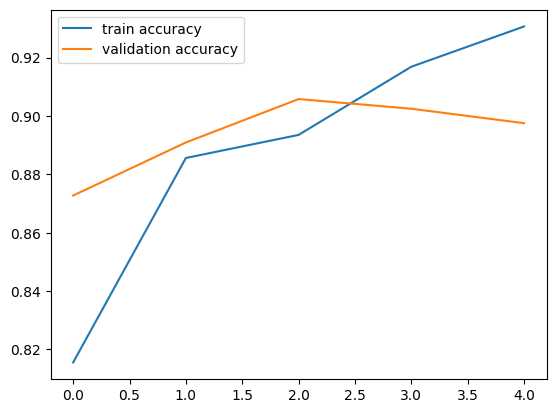

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System



Path of the image to be predicted: /content/with_mask_10.jpg


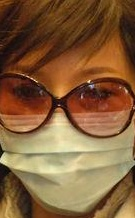

1/1 [==============================] - 0s 338ms/step
[[0.15493298 0.71718246]]
1
The person in the image is wearing a mask


In [ ]:
import cv2

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')